<a href="https://colab.research.google.com/github/MirnaHesham/MirnaHesham/blob/main/PCA_MNISTipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read MNIST

In [ ]:
from keras.datasets import mnist
from sklearn.datasets import fetch_openml
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh 
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

In [ ]:
mnist = fetch_openml("mnist_784", version=1, as_frame=False)

In [ ]:
mnist_data=pd.DataFrame(mnist.data)

In [ ]:
mnist_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,147.0,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(X[0].shape)
print(y.shape)

(70000, 784)
(784,)
(70000,)


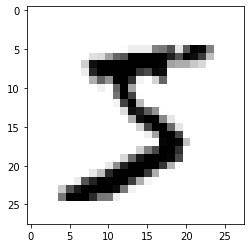

In [ ]:
some_digit = X[0]   # image 0
some_digit_image = some_digit.reshape(28, 28) # Reshaping to 28x28 pixels
plt.imshow(some_digit_image, cmap = plt.cm.binary, interpolation="nearest")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


# Implemented PCA + Classifiers

In [ ]:
def Plot_eigens(First_chosen_EigenValues , size):
  tot = sum(First_chosen_EigenValues)
  var_exp = [(i / tot)*100 for i in sorted(First_chosen_EigenValues, reverse=True)]
  cum_var_exp = np.cumsum(var_exp)

  with plt.style.context('seaborn-whitegrid'):
      plt.figure(figsize=(6, 4))

      plt.bar(range(size), var_exp, alpha=0.5, align='center',
              label='individual explained variance')
      plt.step(range(size), cum_var_exp, where='mid',
              label='cumulative explained variance')
      plt.ylabel('Explained variance ratio')
      plt.xlabel('Principal components')
      plt.legend(loc='best')
      plt.tight_layout()

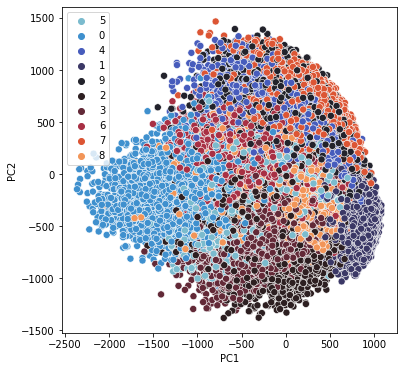

In [ ]:
#using two PCs to project my data first on the train data only
num_components=2
MeanPoints = X_train - np.mean(X_train , axis = 0)
covariance_mat = np.cov(MeanPoints , rowvar = False)
eigen_values , eigen_vectors = np.linalg.eigh(covariance_mat)
sortIndex = np.argsort(eigen_values)[::-1]
eigenvalue_sorted = eigen_values[sortIndex]
eigenvectors_sorted = eigen_vectors[:,sortIndex]
eigenvector_used = eigenvectors_sorted[:,0:num_components]
ProjectedPoints = np.dot(eigenvector_used.transpose() , MeanPoints.transpose() ).transpose()

#Visualize the first 2 eigenVec with my projected data (Train only)
PC = pd.DataFrame(ProjectedPoints , columns = ['PC1','PC2'])
PC = pd.concat([PC , pd.DataFrame(y_train)] , axis = 1)

plt.figure(figsize = (6,6))
sb.scatterplot(data = PC , x = 'PC1',y = 'PC2' , hue = y_train, s = 50 , palette= 'icefire')

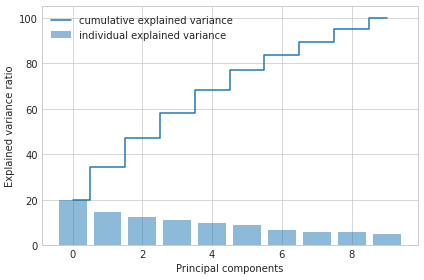

In [ ]:
#plotting First 10 EigenValues of train data only
Chosen_EigenValues=eigenvalue_sorted[:10]
Plot_eigens(Chosen_EigenValues,10)

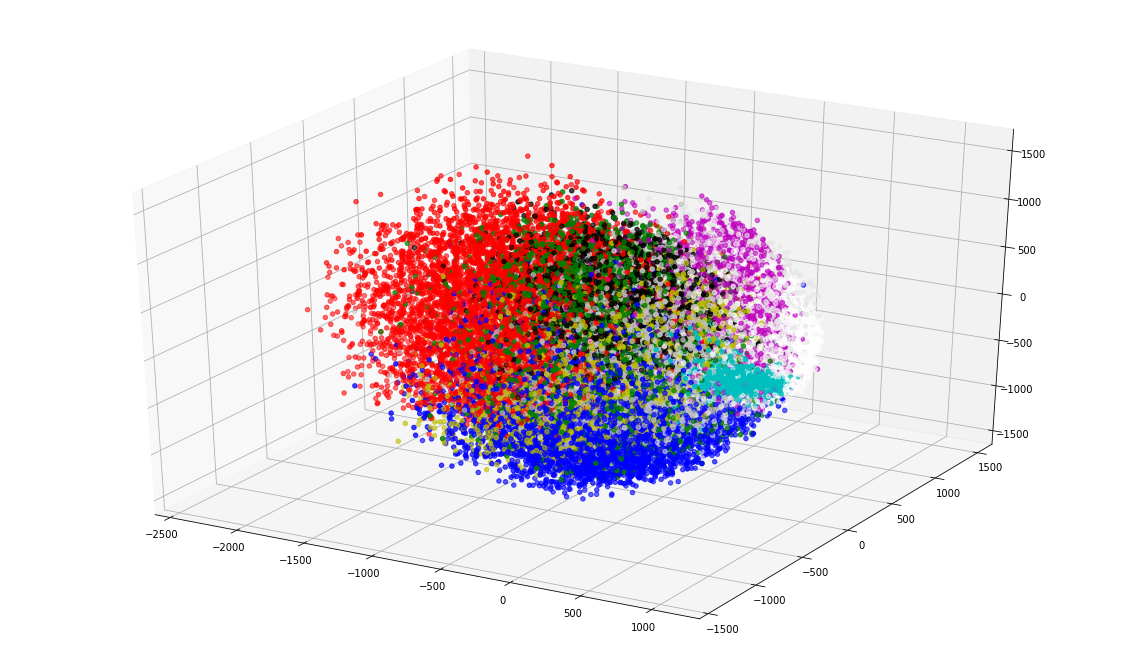

In [ ]:
#using three PCs to project my data first on the train data only
colors=[]
for i in y_train:
  if i=='0':
    colors.append('r')
  if i=='1':
    colors.append('c')
  if i=='2':
    colors.append('g')
  if i=='3':
    colors.append('b')
  if i=='4':
    colors.append('m')
  if i=='5':
    colors.append('y')
  if i=='6':
    colors.append('k')
  if i=='7':
    colors.append('w')
  if i=='8':
    colors.append('0.75')
  if i=='9':
    colors.append('0.90')
    
num_components=3
MeanPoints = X_train - np.mean(X_train , axis = 0)
covariance_mat = np.cov(MeanPoints , rowvar = False)
eigen_values , eigen_vectors = np.linalg.eigh(covariance_mat)
sortIndex = np.argsort(eigen_values)[::-1]
eigenvalue_sorted = eigen_values[sortIndex]
eigenvectors_sorted = eigen_vectors[:,sortIndex]
eigenvector_used = eigenvectors_sorted[:,0:num_components]
ProjectedPoints = np.dot(eigenvector_used.transpose() , MeanPoints.transpose() ).transpose()
#Visualize the first 2 eigenVec with my projected data (Train only)
PC = pd.DataFrame(ProjectedPoints , columns = ['PC1','PC2','PC3'])
PC = pd.concat([PC , pd.DataFrame(y_train)] , axis = 1)

fig = plt.figure(figsize = (20,12))
ax = plt.axes(projection='3d')
ax.scatter3D(PC.iloc[:, 0],PC.iloc[:, 1],PC.iloc[:, 2],c=colors, cmap='Greens');

In [ ]:
print("===== know how much variance in percentage each eigen values can project ==========")
for numberEigenV in range(0,784):
  Chosen_EigenValues=eigenvalue_sorted[:numberEigenV]
  print("------",numberEigenV,"eigen values--------")
  print(sum(Chosen_EigenValues/sum(eigenvalue_sorted)))
  print("")

===== know how much variance in percentage each eigen values can project ==========
------ 0 eigen values--------
0

------ 1 eigen values--------
0.09704664359713912

------ 2 eigen values--------
0.16800588418808382

------ 3 eigen values--------
0.22969677181176518

------ 4 eigen values--------
0.28359096667729883

------ 5 eigen values--------
0.332278936912047

------ 6 eigen values--------
0.3754012500649846

------ 7 eigen values--------
0.4081205496032019

------ 8 eigen values--------
0.4369595040652459

------ 9 eigen values--------
0.4645797980529529

------ 10 eigen values--------
0.48814980354933973

------ 11 eigen values--------
0.5092416997000097

------ 12 eigen values--------
0.5294716105178829

------ 13 eigen values--------
0.5466297925131913

------ 14 eigen values--------
0.563550906833904

------ 15 eigen values--------
0.5793373196389913

------ 16 eigen values--------
0.5941668457712039

------ 17 eigen values--------
0.6074124552802456

------ 18 eigen values

In [ ]:
#Transform My whole data using any chosen number of PCs Then use the classifier in next cells

num_components=185
MeanPoints = mnist_data - np.mean(mnist_data , axis = 0)
covariance_mat = np.cov(MeanPoints , rowvar = False)
eigen_values , eigen_vectors = np.linalg.eigh(covariance_mat)
sortIndex = np.argsort(eigen_values)[::-1]
eigenvalue_sorted = eigen_values[sortIndex]
eigenvectors_sorted = eigen_vectors[:,sortIndex]
eigenvector_used = eigenvectors_sorted[:,0:num_components]
ProjectedPoints = np.dot(eigenvector_used.transpose() , MeanPoints.transpose() ).transpose()

PC = pd.DataFrame(ProjectedPoints)

train= PC[:60000]
test=PC[60000:]

In [ ]:
print("The reconstructed points ")
data_original = np.dot(ProjectedPoints,eigenvector_used.T)+np.mean(X)

The reconstructed points 


Reconstruct the image back


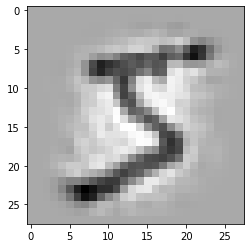

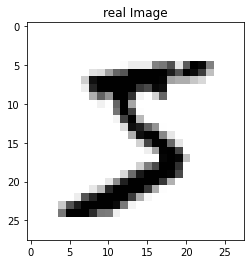

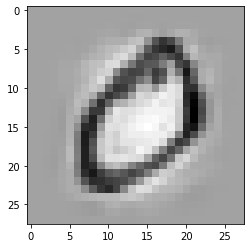

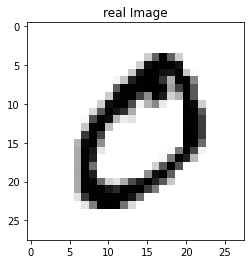

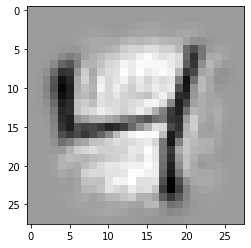

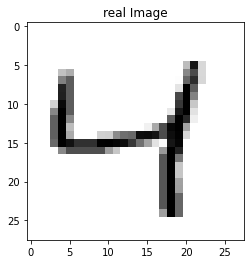

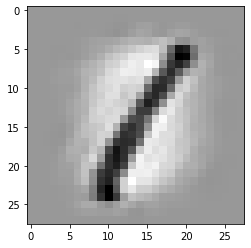

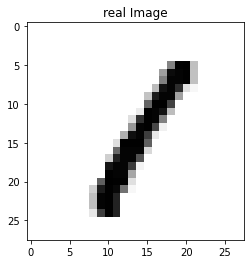

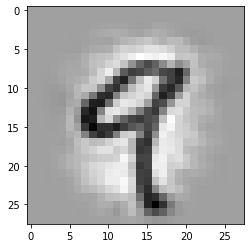

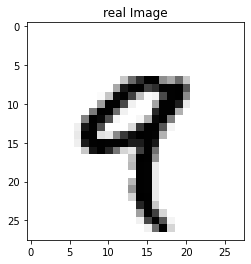

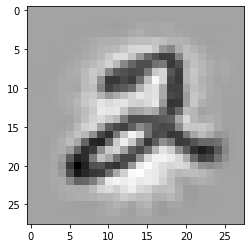

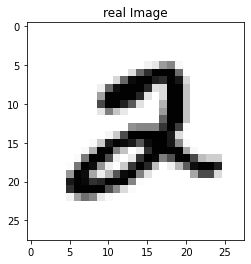

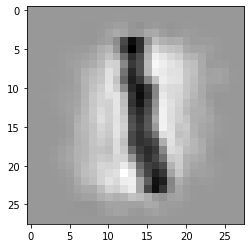

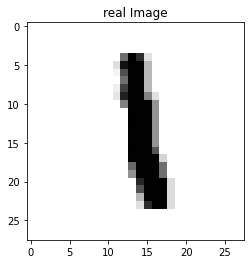

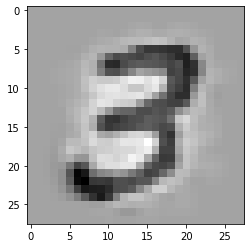

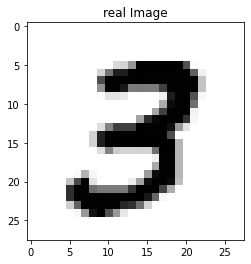

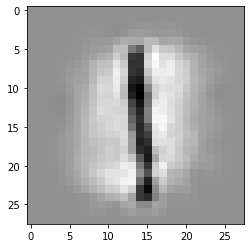

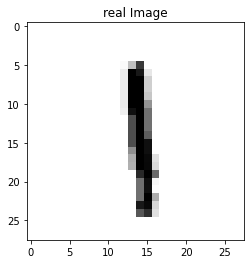

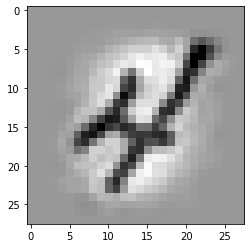

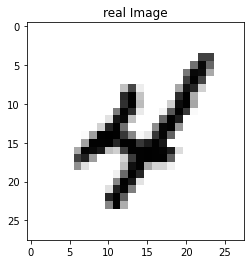

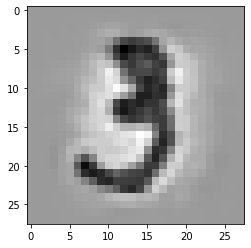

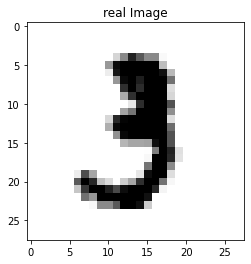

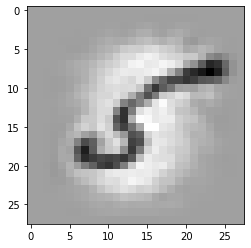

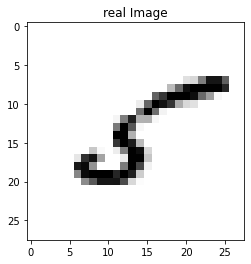

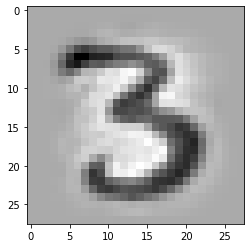

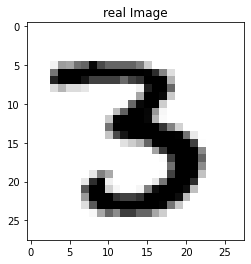

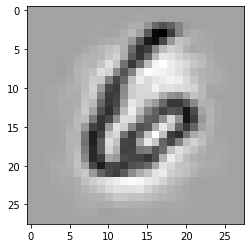

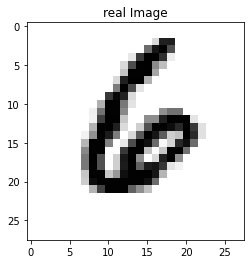

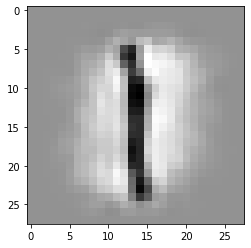

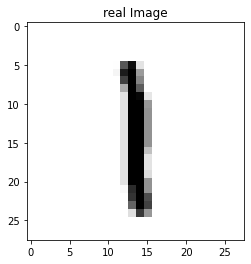

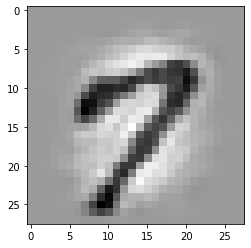

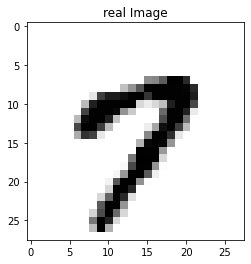

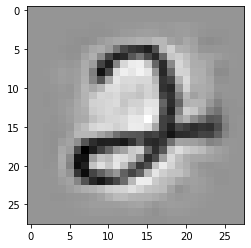

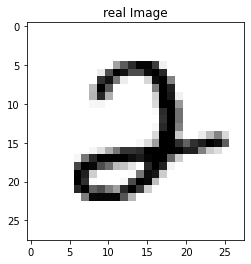

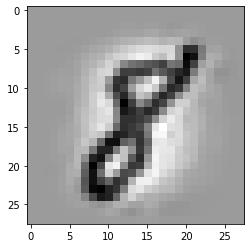

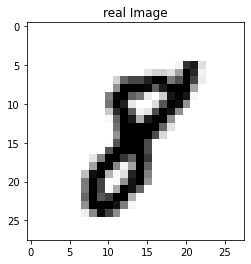

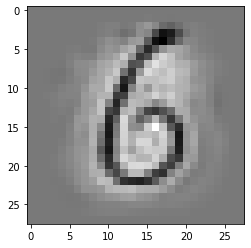

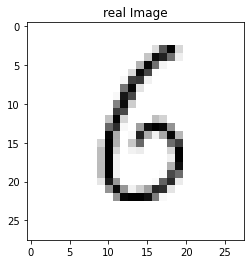

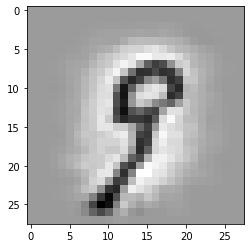

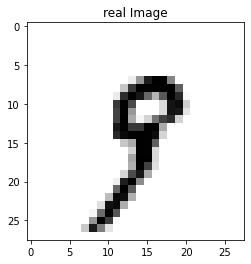

In [ ]:
print("Reconstruct the image back")

for chosenImage in range(0,20):

  some_digit = data_original[chosenImage]
  some_digit_image = some_digit.reshape(28, 28) 
  plt.imshow(some_digit_image, cmap = plt.cm.binary, interpolation="nearest")
  plt.show()
  plt.title("reconstructed Image")

  some_digit = X[chosenImage]  
  some_digit_image = some_digit.reshape(28, 28) 
  plt.imshow(some_digit_image, cmap = plt.cm.binary, interpolation="nearest")
  plt.title("real Image")

  plt.show()

In [ ]:
clf = LogisticRegression(random_state=0).fit(train, y_train)
pred=clf.predict(test)
clf.score(test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9231

In [ ]:
model = GaussianNB()
model.fit(train,y_train)
model.score(test,y_test)
print("score ",clf.score(test,y_test))

score  0.9231


In [ ]:
'''I take time to run, uncomment me if you want to run the SVM'''
# clf = svm.SVC()
# clf.fit(train, y_train)
# print("score ",clf.score(test,y_test))

'I take time to run, uncomment me if you want to run the SVM'

# Classifiers with Multiple number of PC ***Try not to re-run because it takes time, last run 's results are saved and can be seen***

In [ ]:
scoresLogistic=[]
PCAs=[]
for i in range(1,700,50):
  PCAs.append(i)
  num_components=i
  MeanPoints = mnist_data - np.mean(mnist_data , axis = 0)
  covariance_mat = np.cov(MeanPoints , rowvar = False)
  eigen_values , eigen_vectors = np.linalg.eigh(covariance_mat)
  sortIndex = np.argsort(eigen_values)[::-1]
  eigenvalue_sorted = eigen_values[sortIndex]
  eigenvectors_sorted = eigen_vectors[:,sortIndex]
  eigenvector_used = eigenvectors_sorted[:,0:num_components]
  ProjectedPoints = np.dot(eigenvector_used.transpose() , MeanPoints.transpose() ).transpose()
  PC = pd.DataFrame(ProjectedPoints)
  train= PC[:60000]
  test=PC[60000:]
  clf = LogisticRegression(random_state=0).fit(train, y_train)
  pred=clf.predict(test)
  scoresLogistic.append(clf.score(test,y_test))
  print(clf.score(test,y_test))

In [ ]:
plt.figure(figsize=(6, 4))
plt.step(PCAs, scoresSV, where='mid')
plt.ylabel('Accuracy of Logistic Regression')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
scoresSV

[0.3073,
 0.9128,
 0.9173,
 0.9207,
 0.9222,
 0.9216,
 0.9199,
 0.9202,
 0.9194,
 0.9198,
 0.9185,
 0.918,
 0.9178,
 0.9183]

In [ ]:
scoresNaive=[]
for i in range(1,700,50):
  num_components=i
  MeanPoints = mnist_data - np.mean(mnist_data , axis = 0)
  covariance_mat = np.cov(MeanPoints , rowvar = False)
  eigen_values , eigen_vectors = np.linalg.eigh(covariance_mat)
  sortIndex = np.argsort(eigen_values)[::-1]
  eigenvalue_sorted = eigen_values[sortIndex]
  eigenvectors_sorted = eigen_vectors[:,sortIndex]
  eigenvector_used = eigenvectors_sorted[:,0:num_components]
  ProjectedPoints = np.dot(eigenvector_used.transpose() , MeanPoints.transpose() ).transpose()
  PC = pd.DataFrame(ProjectedPoints)
  train= PC[:60000]
  test=PC[60000:]
  model = GaussianNB()
  model.fit(train,y_train)
  scoresNaive.append(model.score(test,y_test))

No handles with labels found to put in legend.


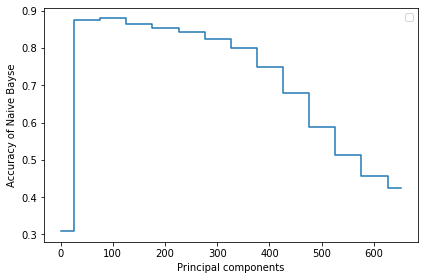

In [ ]:
plt.figure(figsize=(6, 4))
plt.step(PCAs, scoresNaive, where='mid')
plt.ylabel('Accuracy of Naive Bayse')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
scoresNaive

[0.3087,
 0.876,
 0.8793,
 0.8654,
 0.8536,
 0.8415,
 0.8235,
 0.7986,
 0.7486,
 0.678,
 0.5883,
 0.5127,
 0.457,
 0.4247]

In [ ]:
scoresSVM=[]
PCAsSVM=[]
clf = svm.SVC()
for i in range(1,700,100):
  PCAsSVM.append(i)
  num_components=i
  MeanPoints = mnist_data - np.mean(mnist_data , axis = 0)
  covariance_mat = np.cov(MeanPoints , rowvar = False)
  eigen_values , eigen_vectors = np.linalg.eigh(covariance_mat)
  sortIndex = np.argsort(eigen_values)[::-1]
  eigenvalue_sorted = eigen_values[sortIndex]
  eigenvectors_sorted = eigen_vectors[:,sortIndex]
  eigenvector_used = eigenvectors_sorted[:,0:num_components]
  ProjectedPoints = np.dot(eigenvector_used.transpose() , MeanPoints.transpose() ).transpose()
  PC = pd.DataFrame(ProjectedPoints)
  train= PC[:60000]
  test=PC[60000:]
  clf.fit(train, y_train)
  print("score ",clf.score(test,y_test))
  scoresSVM.append(clf.score(test,y_test))

No handles with labels found to put in legend.


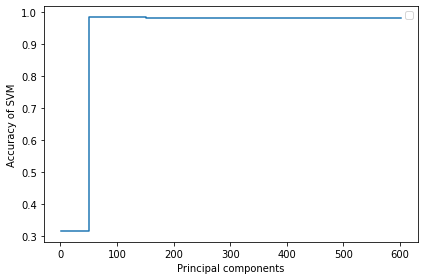

In [ ]:
plt.figure(figsize=(6, 4))
plt.step(PCAsSVM, scoresSVM, where='mid')
plt.ylabel('Accuracy of SVM')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
scoresSVM

[0.3151, 0.9843, 0.9829, 0.9823, 0.9823, 0.9824, 0.9824]